In [1]:
import pandas as pd
import pickle
import numpy as np

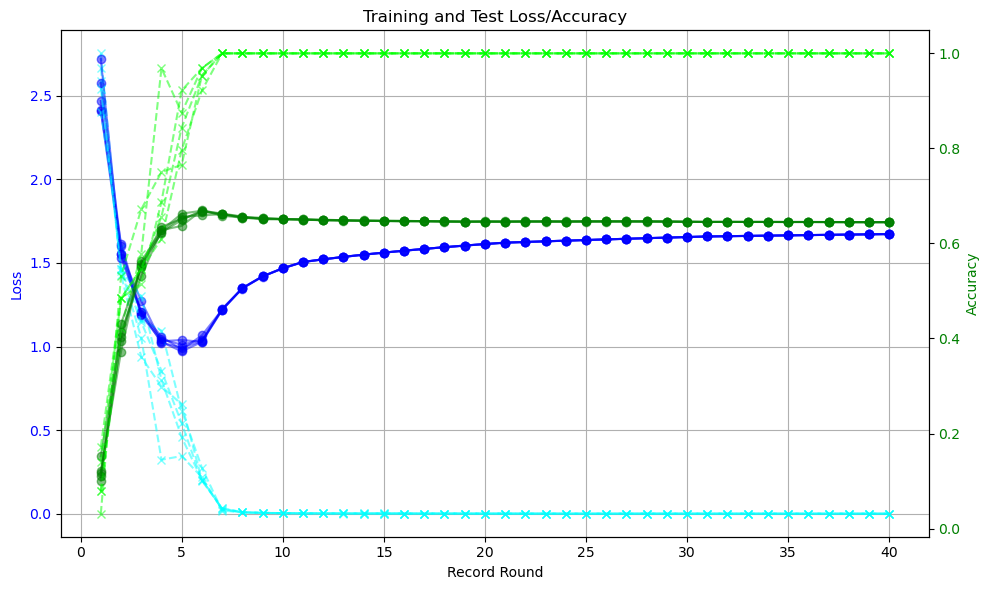

In [8]:
import matplotlib.pyplot as plt
import pickle

def createLossAccPlot():

    # Load the data
    with open("testLosses.pck", "rb") as f:
        testLosses = pickle.load(f)
        
    with open("trainLosses.pck", "rb") as f:
        trainLosses = pickle.load(f)
        
    with open("testACCs.pck", "rb") as f:
        testAcc = pickle.load(f)
        
    with open("trainACCs.pck", "rb") as f:
        trainAcc = pickle.load(f)
    
    # Generate epochs based on the length of the losses
    x_val = range(1, len(testLosses[0]) + 1)
    
    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot loss on the left y-axis
    ax1.set_xlabel("Record Round")
    ax1.set_ylabel("Loss", color="blue")
    for i in range(5):
        ax1.plot(x_val, testLosses[i], marker='o', label=f"Test Loss {i+1}", color="blue", alpha=0.5)
        ax1.plot(x_val, trainLosses[i], marker='x', label=f"Train Loss {i+1}", linestyle='dashed', color="cyan", alpha=0.5)
    ax1.tick_params(axis='y', labelcolor="blue")
    ax1.grid(True)
    
    # Create a second y-axis for accuracy
    ax2 = ax1.twinx()
    ax2.set_ylabel("Accuracy", color="green")
    for i in range(5):
        ax2.plot(x_val, testAcc[i], marker='o', label=f"Test Acc {i+1}", color="green", alpha=0.5)
        ax2.plot(x_val, trainAcc[i], marker='x', label=f"Train Acc {i+1}", linestyle='dashed', color="lime", alpha=0.5)
    ax2.tick_params(axis='y', labelcolor="green")
    
    # Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    #ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper center", ncol=2)
    
    plt.title("Training and Test Loss/Accuracy")
    plt.tight_layout()
    plt.show()
    plt.savefig("lossAcc.png")
